# (PISA 2012 Analysis)
## by (Mohammad Ayman)

## Preliminary Wrangling

> Dataset from Pisa 2012 Test taken by students from over 60 countries that aims to study the effects of various elements on how the students would score on three main subjects: Maths, Science, and Reading. And furthermore, and what's this test aims about, is how much are students ready for the real world and career opportunities and efficency. Also PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.


> Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from outputs
import warnings
warnings.simplefilter("ignore")

I've made a `df.copy()` of the columns I want to work with, and won't be uploading the full dataset in my project zip file, because it takes big time to upload, since internet in my region is slow.

In [2]:
# pisa = pd.read_csv("pisa2012.csv")

# pisa.head()

In [3]:
# pisa_sub.isnull().sum().sum()

In [4]:
# pisa.shape

In [5]:
pisa_sub = pd.read_csv("pisa_sub.csv")

pisa_sub.head()

,CNT,OECD,GRADE,TEACHSUP,DISCLIMA,ST29Q05,ST04Q01,ST43Q01,ST43Q02,ST43Q03,...,ST43Q05,ST43Q06,ST93Q01,ST93Q03,ST93Q04,ST93Q06,ST93Q07,ST44Q05,W_FSTUWT,math_sum
0,Albania,Non-OECD,0.0,1.68,1.85,Agree,Female,Agree,Disagree,Disagree,...,NaN,Disagree,Very much like me,Very much like me,Very much like me,Somewhat like me,Very much like me,Likely,8.9096,1830.9317
1,Albania,Non-OECD,0.0,NaN,NaN,Agree,Female,Strongly agree,Strongly agree,Strongly disagree,...,Agree,Disagree,Not at all like me,Not at all like me,Mostly like me,Somewhat like me,Very much like me,Very Likely,8.9096,2352.8198
2,Albania,Non-OECD,-1.0,NaN,NaN,Strongly agree,Female,Strongly agree,Agree,Strongly agree,...,Strongly agree,Strongly disagree,Not much like me,Not much like me,Very much like me,Very much like me,Somewhat like me,Very Likely,8.4871,2527.6912
3,Albania,Non-OECD,-1.0,1.68,1.80,NaN,Female,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.4871,2247.2738
4,Albania,Non-OECD,-1.0,0.11,-0.08,Strongly agree,Female,Strongly agree,Strongly agree,Disagree,...,Strongly agree,Disagree,NaN,Mostly like me,Very much like me,Very much like me,Very much like me,Likely,8.4871,1927.5199


The data has so many null values, with total of 88.7M nulls

### What is the structure of your dataset?

> Our dataset contains 636 Variables, with 485490 entries.

### What is/are the main feature(s) of interest in your dataset?

>**GRADE: which is students' grade compared to the modal grade in their country.** This one, I think, would be suitable if we'd want to look into specific country, and compare students grades to the modal grade in country.

>**W_FSTUWT**: Final Student Weight (Grade). This one is more suitable for general analysis over the whole dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
We'll be looking into the specific traits of students, and their perceived self-image that are: **Perceived sense of Control**, and **Perceived Attributes to failure** and how these two queries affect their grades and preparedness for real world jobs.

## Cleaning

> as it turns out the dataset is too big to work on it fluidly, at least for my own project's purpose, so in this cleaning step I'm going to select column that are of my project's interest, and leaving those that I don't need

In [6]:
# columns = ["CNT", "OECD", "GRADE", "TEACHSUP", "DISCLIMA",
#            "ST29Q05", "ST04Q01",
#            "ST43Q01", "ST43Q02", "ST43Q03", "ST43Q04", "ST43Q05", "ST43Q06",
#            "ST93Q01", "ST93Q03", "ST93Q04", "ST93Q06", "ST93Q07","ST44Q05",
#            "W_FSTUWT"]

# pisa_sub = pisa[columns].copy()

# pisa_sub.head()

In [7]:
pisa_sub.isnull().sum().sum() # with the new subset df, we now have 2.4M null instead of 88.7M

2580247

Nulls are plenty in the dataset, I don't think I can afford to remove them, maybe we could do something else with them instead but I don't want that to affect my analysis/Visualization, so I'm keeping them...

The good thing is they're not present in plausible values for Maths / Reading / Science so they don't affect calculating their average scores in the next step(s)

In [8]:
pisa_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 21 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   CNT       485490 non-null  object 
 1   OECD      485490 non-null  object 
 2   GRADE     484617 non-null  float64
 3   TEACHSUP  316371 non-null  float64
 4   DISCLIMA  314777 non-null  float64
 5   ST29Q05   315231 non-null  object 
 6   ST04Q01   485490 non-null  object 
 7   ST43Q01   314971 non-null  object 
 8   ST43Q02   314182 non-null  object 
 9   ST43Q03   313494 non-null  object 
 10  ST43Q04   313420 non-null  object 
 11  ST43Q05   313228 non-null  object 
 12  ST43Q06   313470 non-null  object 
 13  ST93Q01   312856 non-null  object 
 14  ST93Q03   312140 non-null  object 
 15  ST93Q04   311311 non-null  object 
 16  ST93Q06   312270 non-null  object 
 17  ST93Q07   312259 non-null  object 
 18  ST44Q05   312996 non-null  object 
 19  W_FSTUWT  485490 non-null  float64
 20  math

In [9]:
pisa_sub.duplicated().sum() # No DUPLICATED ROWS

5

## Univariate Exploration


In [10]:
pisa_sub.describe()

,GRADE,TEACHSUP,DISCLIMA,W_FSTUWT,math_sum
count,484617.000000,316371.000000,314777.000000,485490.000000,485490.000000
mean,-0.162964,0.152789,-0.002501,50.919113,2348.256169
std,0.655558,0.995688,0.993017,107.382092,503.933050
min,-3.000000,-2.920000,-2.480000,1.000000,273.835400
25%,0.000000,-0.470000,-0.710000,6.386300,1980.098100
50%,0.000000,0.110000,-0.080000,15.782900,2328.672600
75%,0.000000,0.970000,0.810000,44.473300,2700.615300
max,3.000000,1.680000,1.850000,2597.884400,4515.539800


We'll Start by seeing the overall look of how students perceive themselves -- First I'll introduce visuals about their perceived sense of control

Since there's many variables that relative to each other, we'll be exploring them together in a grouped-plots way.

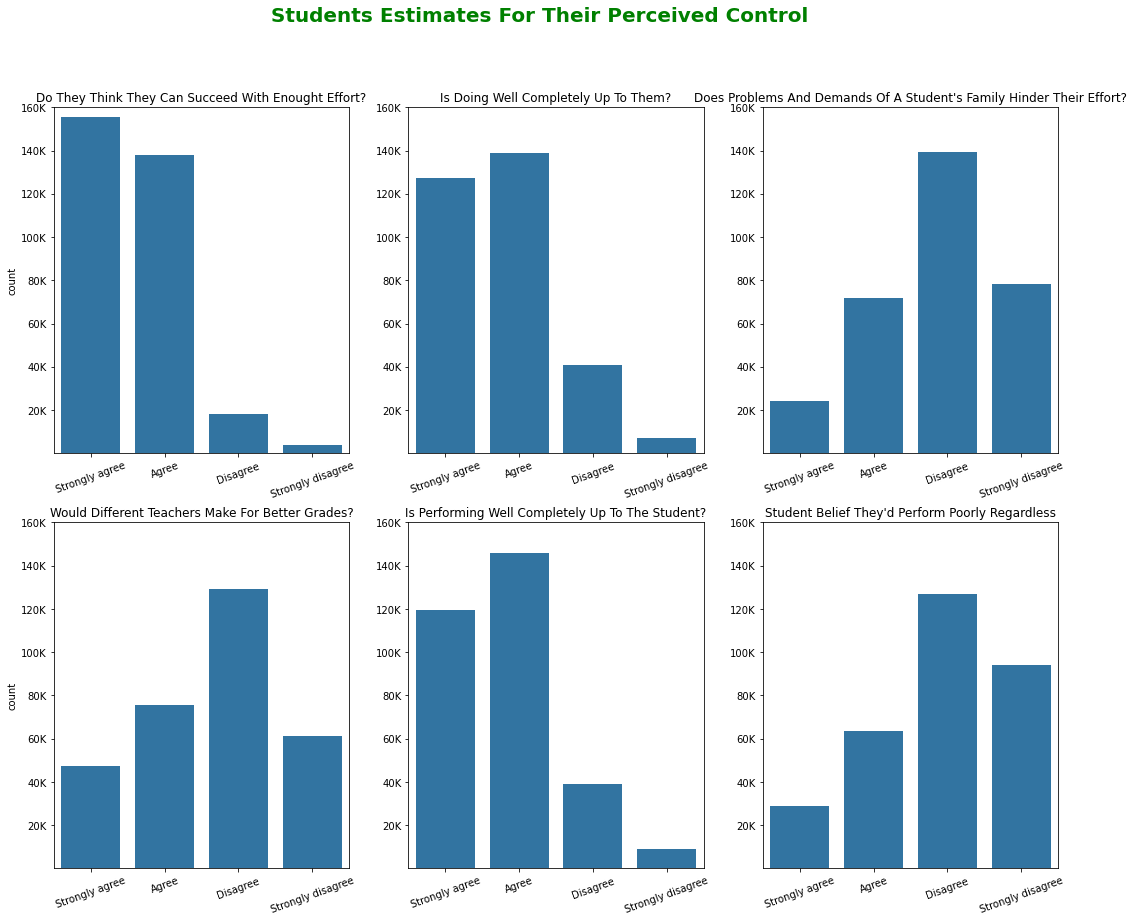

In [11]:
agreement_order = ["Strongly agree", "Agree", "Disagree", "Strongly disagree"]
agreement_cat = pd.api.types.CategoricalDtype(ordered=True, categories=agreement_order)
base_color = sb.color_palette()[0]
yticks = [[2e4, 4e4, 6e4, 8e4, 1e5, 12e4, 14e4, 16e4],
          ["20K", "40K", "60K", "80K", "100K", "120K", "140K", "160K"]]

pisa_sub.ST43Q01 = pisa_sub.ST43Q01.astype(agreement_cat)
pisa_sub.ST43Q02 = pisa_sub.ST43Q02.astype(agreement_cat)
pisa_sub.ST43Q03 = pisa_sub.ST43Q03.astype(agreement_cat)
pisa_sub.ST43Q04 = pisa_sub.ST43Q04.astype(agreement_cat)
pisa_sub.ST43Q05 = pisa_sub.ST43Q05.astype(agreement_cat)
pisa_sub.ST43Q06 = pisa_sub.ST43Q06.astype(agreement_cat)


plt.figure(figsize=[18,14])
plt.suptitle("Students Estimates For Their Perceived Control",
             fontsize=20, fontweight='bold', color="green")

# Do they think they can succeed with enough effort?
plt.subplot(231)
sb.countplot(data=pisa_sub, x="ST43Q01", color=base_color)
plt.title("Do they think they can succeed with enought effort?".title())
plt.xlabel("") # Hiding meaningless x label
plt.xticks(rotation= 20)
plt.ylim(0,160000) # We're setting all ylim to 160K, since that's the highest count for an x value,
                   # also to mantain plotting integrity
plt.yticks(yticks[0], yticks[1])

# Do they think doing well is completely up to them?

plt.subplot(232)
plt.title("Is Doing Well Completely Up To Them?".title())
sb.countplot(data=pisa_sub, x="ST43Q02", color=base_color)
plt.xlabel("")
plt.ylabel("") # Making sure y label "Count" doesn't crowd the visualization in middle sections
plt.xticks(rotation= 20)
plt.ylim(0,160000)
plt.yticks(yticks[0], yticks[1])


# Does family demands and problems prevent them from putting enough effort into school?

plt.subplot(233)
plt.title("Does Problems And Demands Of A Student's Family Hinder Their Effort?")
sb.countplot(data=pisa_sub, x="ST43Q03", color=base_color)
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=20)
plt.ylim(0,160000)
plt.yticks(yticks[0], yticks[1])

# Does Better Teachers Make For Better Grades?

plt.subplot(234)
plt.title("Would different teachers make for better grades?".title())
sb.countplot(data=pisa_sub, x="ST43Q04", color=base_color)
plt.xlabel("")
plt.xticks(rotation=20)
plt.ylim(0,160000)
plt.yticks(yticks[0], yticks[1])

# Would they perform better if they wanted to do so?

plt.subplot(235)
plt.title("Is Performing well completely up to the student?".title())
sb.countplot(data=pisa_sub, x="ST43Q05", color=base_color)
plt.xlabel("")
plt.xticks(rotation=20)
plt.ylabel("")
plt.ylim(0,160000)
plt.yticks(yticks[0], yticks[1])

# Does The Student Think They'll Perform Poorly Regardless?

plt.subplot(236)
plt.title("Student Belief They'd Perform Poorly Regardless")
sb.countplot(data=pisa_sub, x="ST43Q06", color=base_color)
plt.xlabel("")
plt.xticks(rotation=20)
plt.ylabel("")
plt.yticks(yticks[0], yticks[1])
plt.ylim(0,160000);

* High percentage of students have a belief that even if they got bad grades, they'd get it better if they actually put enough effort into it,
* but even though there's less than 30k students that believe that they wouldn't be able to do so, in the last graph there's more than 70k who think they'd get poor grades regardless of what, meaning no matter how good teachers, quantity of hours put into studying, or any instruments that might contribute to better grades or better performance, whether they put those things into mind or not, A whole 70k which is almost %15 think they are helpless. 
* And coincidentally, in the third graph shows almost the same amount of students thinking that **Family Problems and Demands** make for an obstacle to putting enough effort, and it seems Odd to me, is it because of their family expectations/ or problems in their home environment, that they have low self-esteem or low belief in their capabilities?

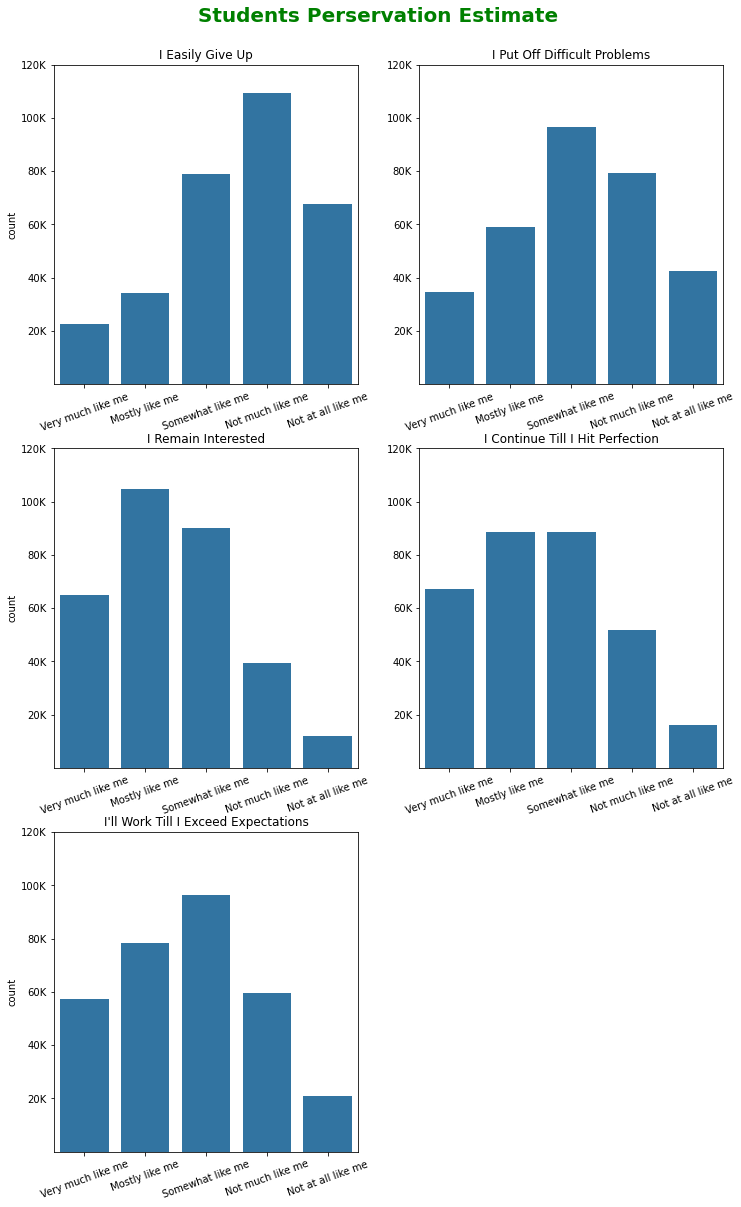

In [12]:
likelihood_order = ["Very much like me", "Mostly like me", "Somewhat like me", "Not much like me", "Not at all like me"]
likelihood_cat = pd.api.types.CategoricalDtype(ordered=True, categories=likelihood_order)

# Assigning Order
pisa_sub.ST93Q01 = pisa_sub.ST93Q01.astype(likelihood_cat)
pisa_sub.ST93Q03 = pisa_sub.ST93Q03.astype(likelihood_cat)
pisa_sub.ST93Q04 = pisa_sub.ST93Q04.astype(likelihood_cat)
pisa_sub.ST93Q06 = pisa_sub.ST93Q06.astype(likelihood_cat)
pisa_sub.ST93Q07 = pisa_sub.ST93Q07.astype(likelihood_cat)

plt.figure(figsize=[12,20])
plt.suptitle("Students Perservation Estimate", 
             fontsize=20, fontweight='bold', color="green", y=.92)
yticks2 = [[2e4, 4e4, 6e4, 8e4, 1e5, 12e4],
          ["20K", "40K", "60K", "80K", "100K", "120K"]]

# I Easily Give Up

plt.subplot(321)
sb.countplot(data=pisa_sub, x="ST93Q01", color=base_color)
plt.title("I Easily Give Up")
plt.xlabel("")
plt.xticks(rotation=20)
plt.yticks(yticks[0], yticks[1])
plt.ylim(0,12e4)

# Putting Aside Difficult Problems

plt.subplot(322)
sb.countplot(data=pisa_sub, x="ST93Q03", color=base_color)
plt.title("I Put Off Difficult Problems")
plt.xlabel("")
plt.xticks(rotation=20)
plt.yticks(yticks[0], yticks[1])
plt.ylabel("")
plt.ylim(0,12e4)

# My Interest is mantained in the subject at hand

plt.subplot(323)
sb.countplot(data=pisa_sub, x="ST93Q04", color=base_color)
plt.title("I Remain Interested")
plt.xlabel("")
plt.xticks(rotation=20)
plt.yticks(yticks[0], yticks[1])
plt.ylim(0,12e4)


# I Strive For Perfection

plt.subplot(324)
sb.countplot(data=pisa_sub, x="ST93Q06", color=base_color)
plt.title("I Continue Till I Hit Perfection")
plt.xlabel("")
plt.xticks(rotation=20)
plt.yticks(yticks[0], yticks[1])
plt.ylim(0,12e4)
plt.ylabel("")


# I Perserve Till I Exceed Expectations
plt.subplot(325)
sb.countplot(data=pisa_sub, x="ST93Q07", color=base_color)
plt.title("I'll Work Till I Exceed Expectations")
plt.xlabel("")
plt.xticks(rotation=20)
plt.yticks(yticks[0], yticks[1])
plt.ylim(0,12e4);

Students seems to be fairly distributed in the 3 middle sections -- Mostly.., Somewhat...,Not much like me-- and generally more distributed on the positive side of perservation scale than on the negative side.

In [13]:
def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

`without_hue()` is a function to draw count percentage for every bar, of which I got from an answer on [stack overflow](https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn)

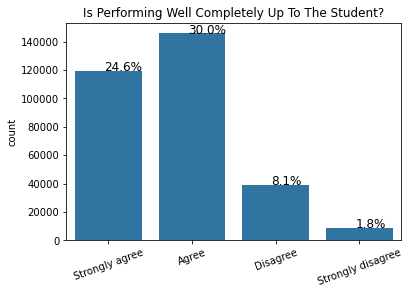

In [14]:
ax =sb.countplot(data=pisa_sub, x="ST43Q05", color=base_color)
plt.title("Is Performing well completely up to the student?".title())
plt.xlabel("")
plt.xticks(rotation=20)

without_hue(ax, pisa_sub.ST43Q05)

Following from the last observation, %54.6 of students are more determent and have tendency to see themselves as the lone responsible for their performance, because at the end of the day, if the teacher does an exteremly good job on educating students, and they're lazy or slack off, no good result will come out.

Next we're looking into the percentage of OECD countries that are enrolled in pisa 2012 test

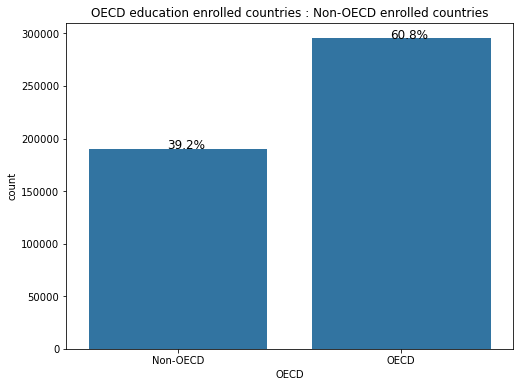

In [15]:
plt.figure(figsize=[8,6])
ax = sb.countplot(data=pisa_sub, x="OECD", color=base_color)
plt.title("OECD education enrolled countries : Non-OECD enrolled countries")

without_hue(ax, pisa_sub.OECD)

**How many Females : Males are participated?**

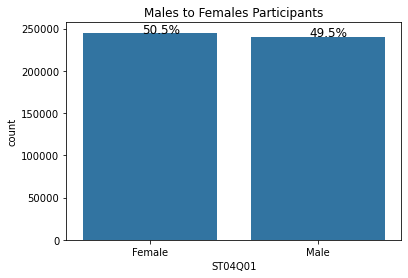

In [16]:
ax = sb.countplot(data=pisa_sub, x="ST04Q01", color=base_color)
plt.title("Males to Females Participants")

without_hue(ax, pisa_sub.ST04Q01)

Both are equal in number, in terms of participation so that it won't skew our statistics due to unbalanced numbers.

**Next, How much students look at Maths as an exteremly difficult subject, how many doesn't, and those students in between?**

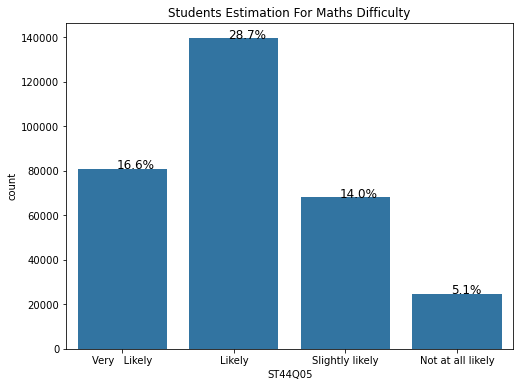

In [17]:
likelihood_order = ["Very   Likely", "Likely", "Slightly likely", "Not at all likely"]
likelihood_cat = pd.api.types.CategoricalDtype(ordered=True, categories=likelihood_order)
pisa_sub.ST44Q05 = pisa_sub.ST44Q05.astype(likelihood_cat)

plt.figure(figsize=[8,6])
ax = sb.countplot(data=pisa_sub, x="ST44Q05", color=base_color)
plt.title("Students Estimation For Maths Difficulty")

without_hue(ax, pisa_sub.ST44Q05)

Majority of students think of maths as too hard, or just hard, we gotta investigate what could affect that number and whether those who don't see it as hard have had other affecting elements.

**Next, How much think they're worthwhile the career chances that might get their way?**

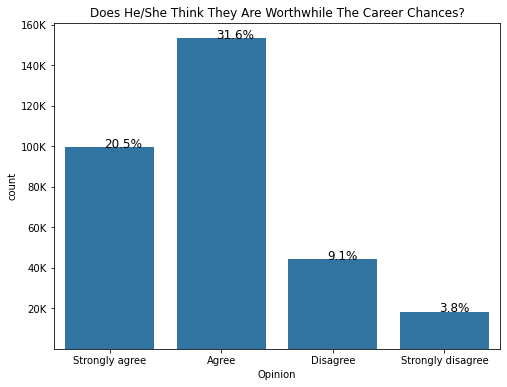

In [18]:
agreeing_order = ["Strongly agree", "Agree", "Disagree", "Strongly disagree"]
agreeing_cat = pd.api.types.CategoricalDtype(ordered=True, categories=agreeing_order)
pisa_sub.ST29Q05 = pisa_sub.ST29Q05.astype(agreeing_cat)

yticks = [[2e4, 4e4, 6e4, 8e4, 1e5, 12e4, 14e4, 16e4],
          ["20K", "40K", "60K", "80K", "100K", "120K", "140K", "160K"]]

# Does the student think they're worth career chances?

plt.figure(figsize=[8,6])

ax = sb.countplot(data=pisa_sub, x="ST29Q05", color=base_color)
plt.xlabel("Opinion")
plt.yticks(yticks[0], yticks[1])
plt.title("Does He/She Think They Are Worthwhile The Career Chances?")

without_hue(ax, pisa_sub.ST29Q05)

Most students think they're worthwile career chances, of those who don't what could be the cause that they think they're not worth it?

**Onward, seeing the distribution of Teacher's support scores and Disciplinary Cliamte scores across the dataset.**

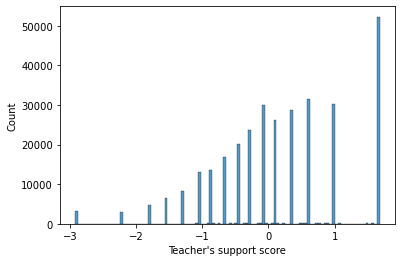

In [19]:
sb.histplot(data=pisa_sub, x="TEACHSUP")
plt.xlabel("Teacher's support score");

Teacher's support distribution looks left-skewed with big spike in 1+ values, maybe high amount of students get the amount the support they need, and what deviates their scores from each other is something more significantly impactful.

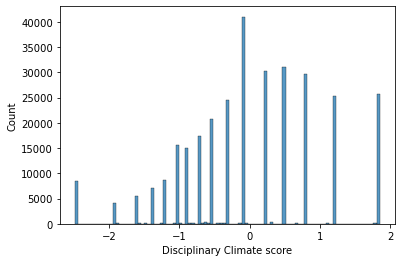

In [20]:
sb.histplot(data=pisa_sub, x="DISCLIMA")
plt.xlabel("Disciplinary Climate score");

Disciplinary cliamte looks almost normally distributed, with a spike in the middle score.

In [22]:
pisa_sub.W_FSTUWT.describe() # Students weights describtion

count    485490.000000
mean         50.919113
std         107.382092
min           1.000000
25%           6.386300
50%          15.782900
75%          44.473300
max        2597.884400
Name: W_FSTUWT, dtype: float64

### How does grade weights vary across PISA participants?

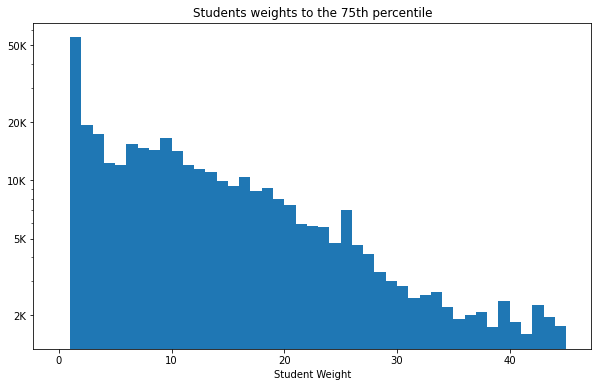

In [25]:
plt.figure(figsize=[10, 6])

bins = np.arange(0, 45.5, 1)
yticks = [["2K", "5K", "10K", "20K", "50K"],[2e3, 5e3, 1e4, 2e4, 5e4]]

plt.hist(pisa_sub.W_FSTUWT, bins=bins);
plt.xlabel("Student Weight")
plt.yscale("log")
plt.yticks(yticks[1], yticks[0])

plt.title("Students weights to the 75th percentile");

75% of participants have their weights fall between 0 - 45

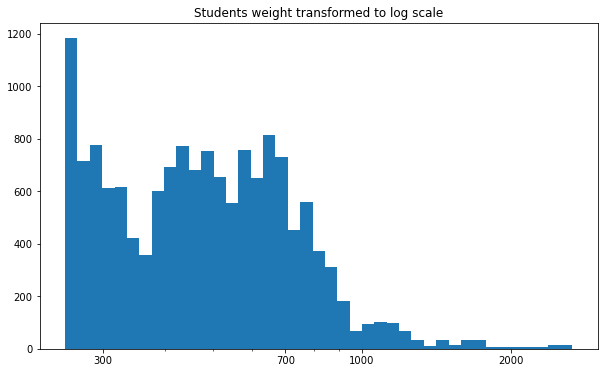

In [27]:
plt.figure(figsize=[10,6])

xbins = np.arange(0, 100, 5)
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(pisa_sub['W_FSTUWT'].max())+log_binsize, log_binsize)
ticks = [300, 700, 1000, 2000]

plt.hist(pisa_sub.W_FSTUWT, bins=bins)
plt.xscale("log")
plt.xticks(ticks, ticks)

plt.title("Students weight transformed to log scale");

From the above plot, there's a chunk of students whose weights pass the normal weights by alot, it seems odd that they'd score that high relative to other students.

**Following, countries that are participated arranged from highest in particpation to the lowest.**

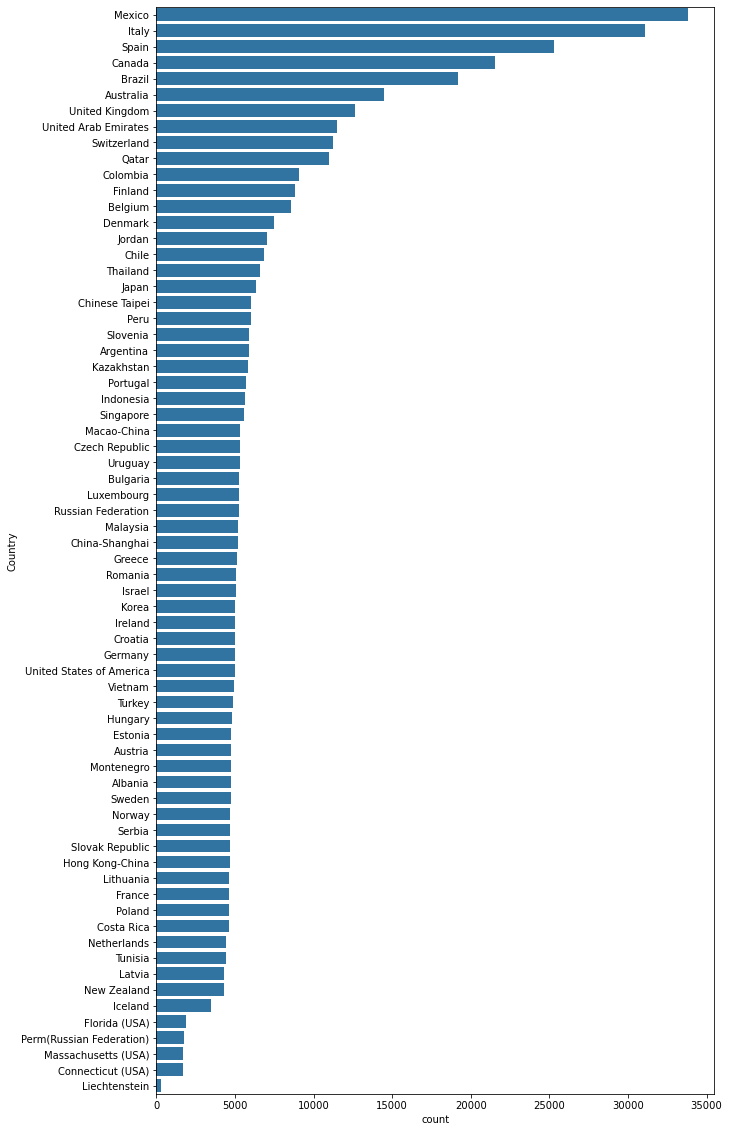

In [28]:
plt.figure(figsize=[10, 20])

sb.countplot(data=pisa_sub, y="CNT", order=pisa_sub.CNT.value_counts().index, color=base_color) # How many students per CNT?
plt.ylabel("Country");

Mexico, Italy, and Spain are relatively high in participation to other countries, and Liechtenstein has an oddly small number of participants.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There was a long tail in the distribution of students weights, so I divided it's plot into two, one that depicts the distribution of 0-75th percentile of data, and the other takes on log transformation to better show the distribution of higher weights.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Only on students weights there were big tail of outliers, where 75% of students fell behing 45 scores, and others that had almost 2000 weight score, so that was unusual.

## Bivariate Exploration

First We'll look into whether that students whose countries have been enrolled in OECD program tend to have better overall scores in Maths, Science, and Reading.

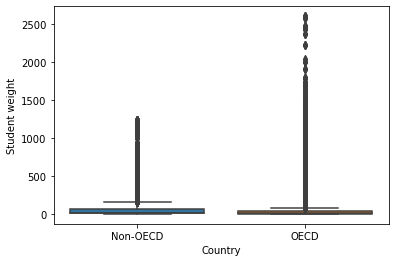

In [29]:
sb.boxplot(data=pisa_sub, x="OECD", y="W_FSTUWT")
plt.xlabel("Country")
plt.ylabel("Student weight");

OECD Countries seems to have more points on the higher ends of students weights, than of Non-OECD

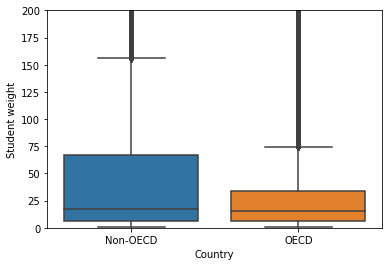

In [30]:
sb.boxplot(data=pisa_sub, x="OECD", y="W_FSTUWT")
plt.ylim(0, 200)
plt.xlabel("Country")
plt.ylabel("Student weight");

Looking at the close-in comparison, Non-OECD seems to have higher Interquartile range than OECD countries, but OECD got higher range of outliers

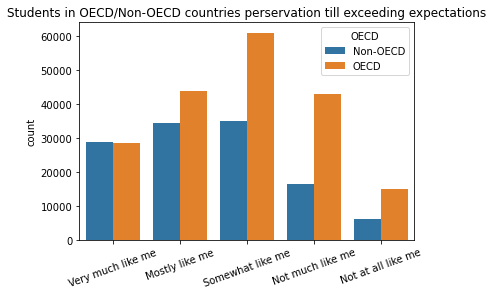

In [31]:
sb.countplot(data=pisa_sub, x="ST93Q07", hue="OECD")
plt.xlabel("")
plt.xticks(rotation=20)
plt.title("Students in OECD/Non-OECD countries perservation till exceeding expectations");

OECD had higher distribution across data, and that's caused by it's relatively high percentage of participation than of Non-OECD countries, but it seems in the tendency of wanting to exceed expectation, **OECD had normally distributed charts, with higher amount of tendency to not want to Exceed expectations in grades and performance.**

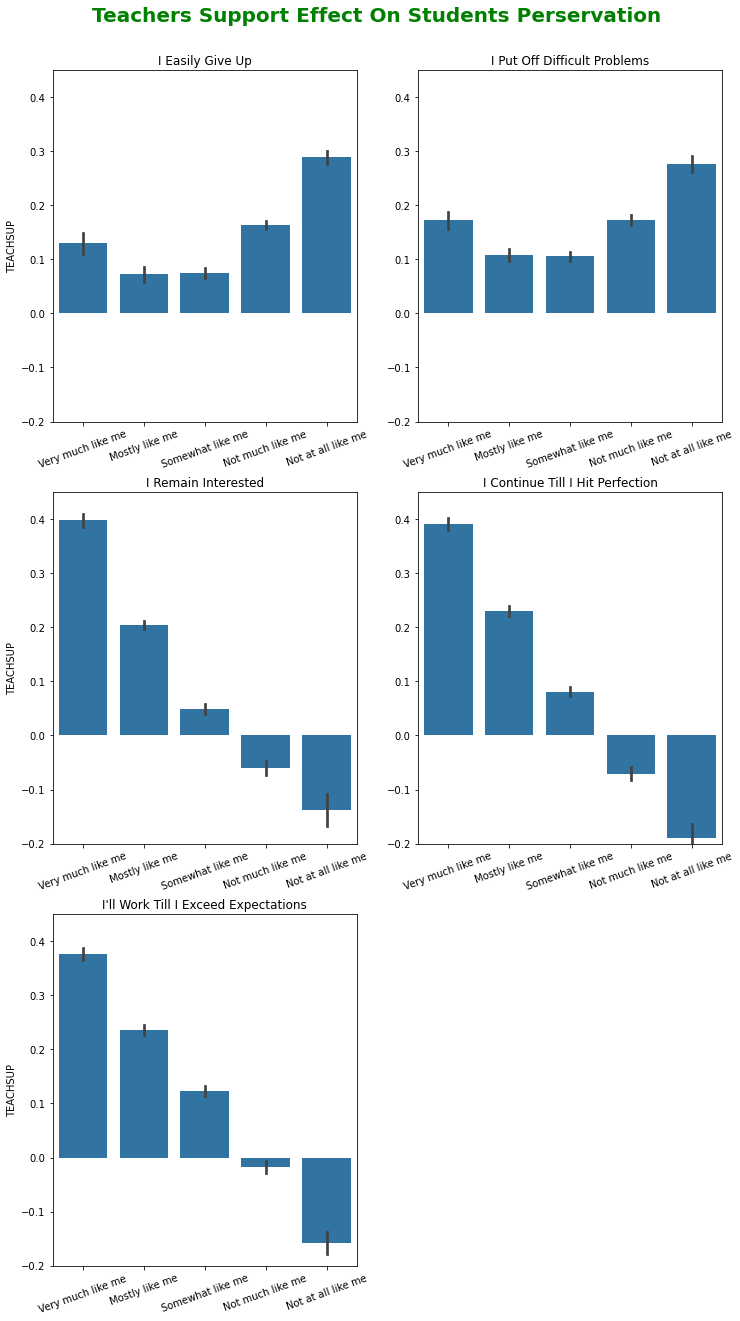

In [32]:
plt.figure(figsize=[12,22])
plt.suptitle("Teachers Support Effect On Students Perservation", 
             fontsize=20, fontweight='bold', color="green", y=0.92)

# I Easily Give Up

plt.subplot(321)
sb.barplot(data=pisa_sub, x="ST93Q01", y="TEACHSUP", color=base_color)
plt.title("I Easily Give Up")
plt.xlabel("")
plt.xticks(rotation=20)
plt.ylim(-0.2,0.45)

# Putting Aside Difficult Problems

plt.subplot(322)
sb.barplot(data=pisa_sub, x="ST93Q03", y="TEACHSUP", color=base_color)
plt.title("I Put Off Difficult Problems")
plt.xlabel("")
plt.xticks(rotation=20)
plt.ylabel("")
plt.ylim(-0.2,0.45)

# My Interest is mantained in the subject at hand

plt.subplot(323)
sb.barplot(data=pisa_sub, x="ST93Q04", y="TEACHSUP", color=base_color)
plt.title("I Remain Interested")
plt.xlabel("")
plt.xticks(rotation=20)
plt.ylim(-0.2,0.45)


# I Strive For Perfection

plt.subplot(324)
sb.barplot(data=pisa_sub, x="ST93Q06", y="TEACHSUP", color=base_color)
plt.title("I Continue Till I Hit Perfection")
plt.xlabel("")
plt.xticks(rotation=20)
plt.ylabel("")
plt.ylim(-0.2,0.45)


# I Perserve Till I Exceed Expectations
plt.subplot(325)
sb.barplot(data=pisa_sub, x="ST93Q07", y="TEACHSUP", color=base_color)
plt.title("I'll Work Till I Exceed Expectations")
plt.xlabel("")
plt.xticks(rotation=20)
plt.ylim(-0.2,0.45);

Teacher's support played a clear role on students perservation and whether they'd strive to exceed expectation / Continue putting in effort till they hit perfection, and on the negative aspects -- like easily giving up -- students who scored high in these aspects received low(er) support, so Teacher's support clearly plays a role in a student's perservation.

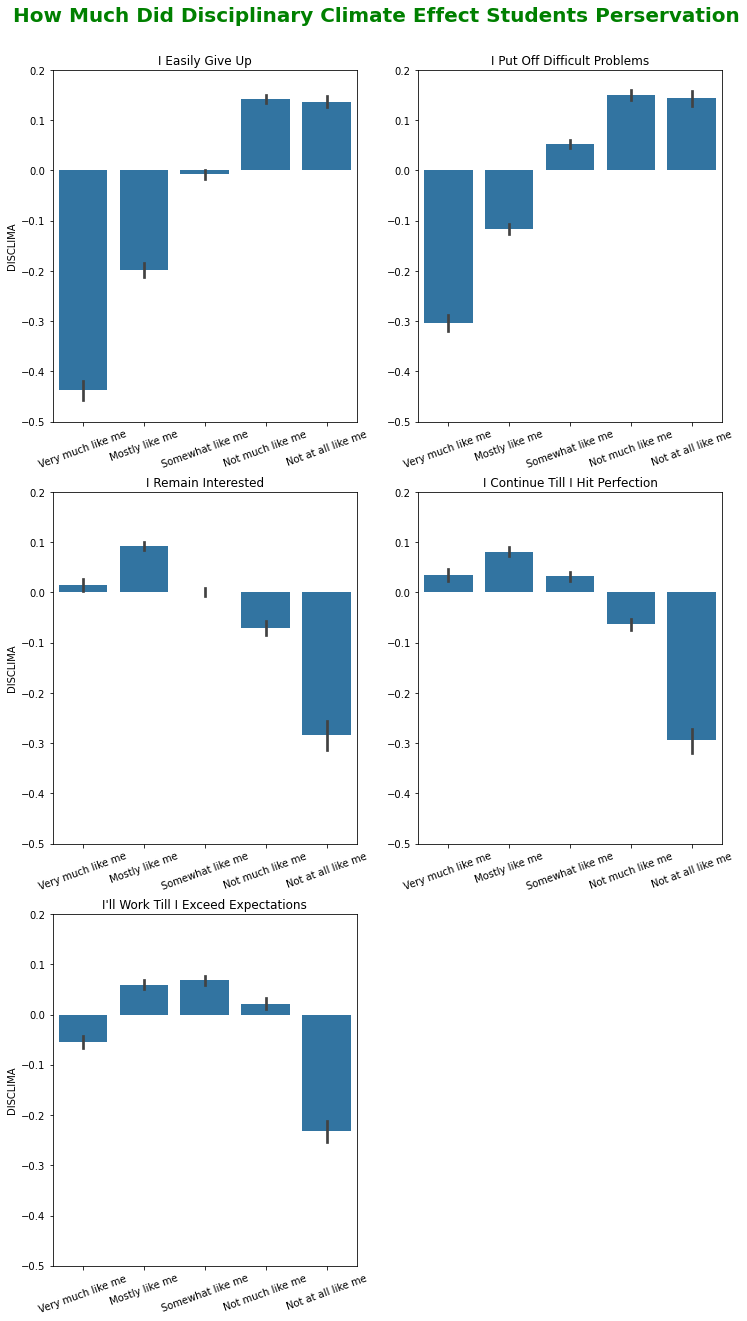

In [33]:
plt.figure(figsize=[12,22])
plt.suptitle("How Much Did Disciplinary Climate Effect Students Perservation", 
             fontsize=20, fontweight='bold', color="green", y=0.92)

# I Easily Give Up

plt.subplot(321)
sb.barplot(data=pisa_sub, x="ST93Q01", y="DISCLIMA", color=base_color)
plt.title("I Easily Give Up")
plt.xlabel("")
plt.xticks(rotation=20)
plt.ylim(-0.5,0.2)

# Putting Aside Difficult Problems

plt.subplot(322)
sb.barplot(data=pisa_sub, x="ST93Q03", y="DISCLIMA", color=base_color)
plt.title("I Put Off Difficult Problems")
plt.xlabel("")
plt.xticks(rotation=20)
plt.ylabel("")
plt.ylim(-0.5,0.2)

# My Interest is mantained in the subject at hand

plt.subplot(323)
sb.barplot(data=pisa_sub, x="ST93Q04", y="DISCLIMA", color=base_color)
plt.title("I Remain Interested")
plt.xlabel("")
plt.xticks(rotation=20)
plt.ylim(-0.5,0.2)


# I Strive For Perfection

plt.subplot(324)
sb.barplot(data=pisa_sub, x="ST93Q06", y="DISCLIMA", color=base_color)
plt.title("I Continue Till I Hit Perfection")
plt.xlabel("")
plt.xticks(rotation=20)
plt.ylabel("")
plt.ylim(-0.5,0.2)


# I Perserve Till I Exceed Expectations
plt.subplot(325)
sb.barplot(data=pisa_sub, x="ST93Q07", y="DISCLIMA", color=base_color)
plt.title("I'll Work Till I Exceed Expectations")
plt.xlabel("")
plt.xticks(rotation=20)
plt.ylim(-0.5,0.2);

From the plots above it seemed that offering a good disciplinary climate plays a good role in getting students motivated, and persevered. In that the higher and the more disciplined climate, the more it played an effective role in students being more persevered about continuing to work and remain interested in the subject, and generally not giving up easily.

Next. Teacher's support effect on students for variance of opinions on whether Maths is too hard or not.

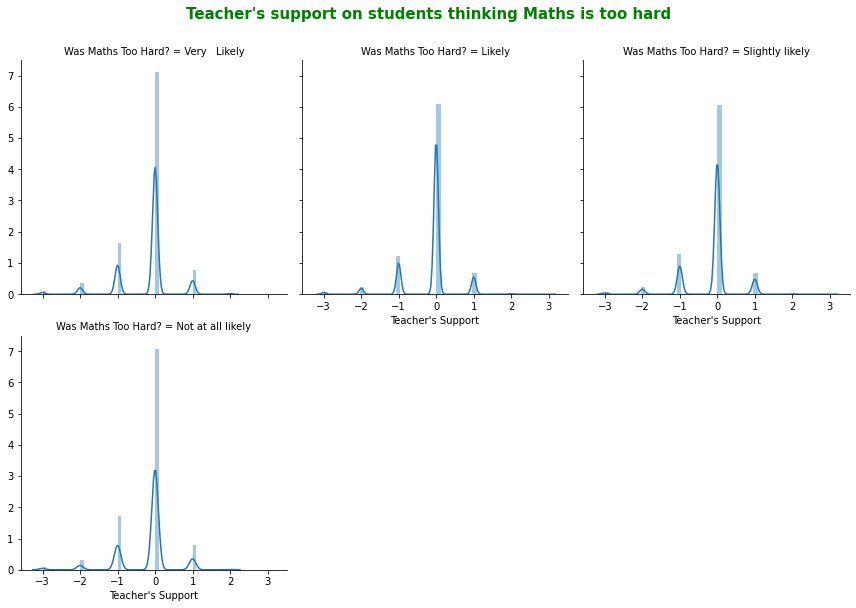

In [34]:
g = sb.FacetGrid(data=pisa_sub, col='ST44Q05', size=4, col_wrap=3) # Maths Was Too Hard
g.map(sb.distplot, "GRADE")
g.set_axis_labels("Teacher's Support")
g.set_titles("Was Maths Too Hard? = {col_name}")

plt.suptitle("Teacher's support on students thinking Maths is too hard", 
             fontsize=15, fontweight='bold', color="green", y=1.05);

There seems to be no major trend of teacher's support efficacy across variations of opinions on maths difficulty.

In [36]:
# Making a new math score sum col. to measure which country had the highest of the five math scores

# pisa["maths_sum"] = pisa["PV1MATH"] + pisa["PV2MATH"] + pisa["PV3MATH"] + pisa["PV4MATH"] + pisa["PV5MATH"]

# pisa.maths_sum.describe()

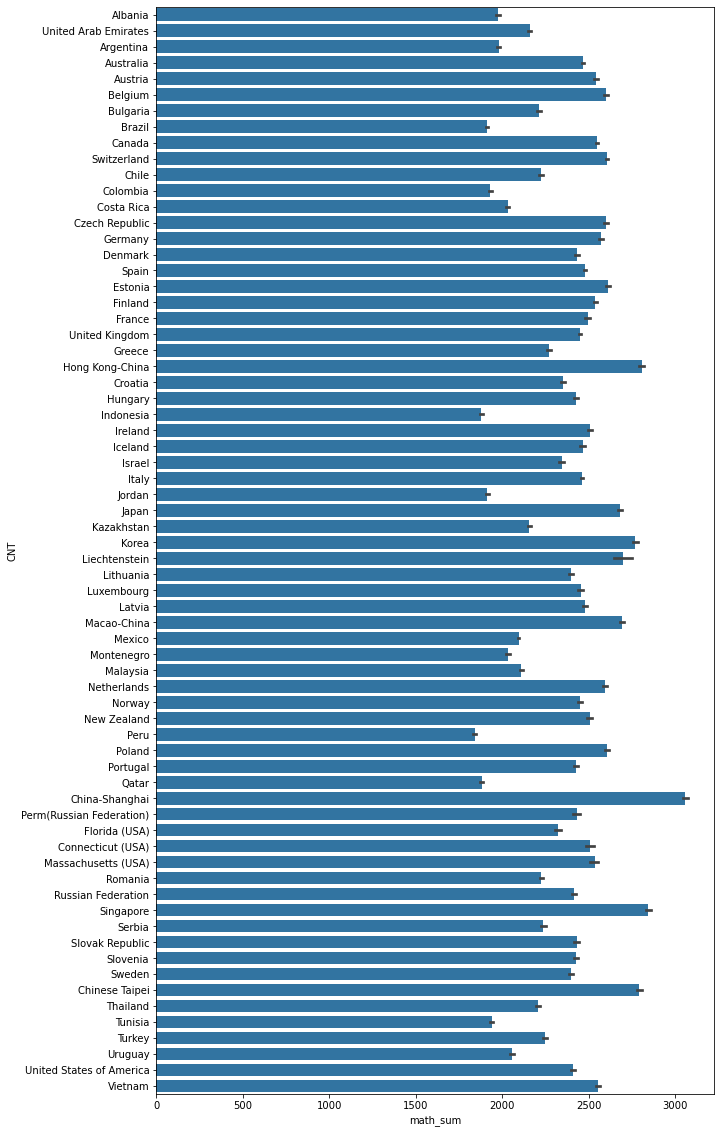

In [39]:
plt.figure(figsize=[10,20])

sb.barplot(data=pisa_sub, y="CNT", x="math_sum", color=base_color);

Of All countries, China Shanghai had the highest score in maths, which is the sum of the five plausible score values in maths, Followed by Singapore.

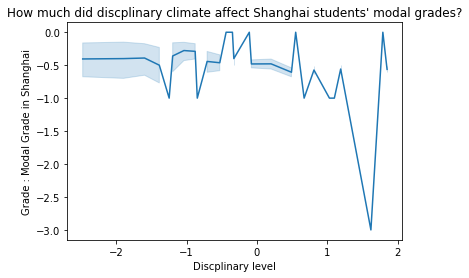

In [40]:
# How much did discplinary climate affect students' scores?

ch_shanghai = pisa_sub.query("CNT == 'China-Shanghai'")

sb.lineplot(data=ch_shanghai, x="DISCLIMA", y='GRADE')
plt.xlabel("Discplinary level")
plt.ylabel("Grade : Modal Grade in Shanghai")
plt.title("How much did discplinary climate affect Shanghai students' modal grades?");

The weird thing is that with inreasing Disciplinary Climate in Shanghai, China, There was a continual drop in students modal grades. We'll be looking more into it in Multivariate stage.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Teacher support had an effect on students that think math is too hard, and was associated overall postivie traits

> Disciplinary climate helped students to have firm believe in themselves, and in believing that they can do better and not easily giving up.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Students with high inclination to Exceed Expectations, had a high score of Teachers supporting them, and that's remarkable, of how a teacher's care or negligence could affect student's mentality, Even when a teacher had neutral effect on a student it was somewhat better than treating them badly - Naturally -, or giving them negative experience that could lead them to, say, hate the subject their whole life, or blocking potential positive outcome just from that negative experience.

> Many Students Thought that Maths was too hard despite receiving good (better than average) support from their teacher, and that may point out to one of two things :
1. Student isn't keen on learning maths, so teacher's support would have little effect in the end.
2. Teacher couldn't get the student interested in the subject (e.g. didn't simplify enough, or give enough examples)

## Multivariate Exploration

In [41]:
# pisa_sub["math_sum"] = pisa['maths_sum'] For first time making pisa_sub.csv dataset

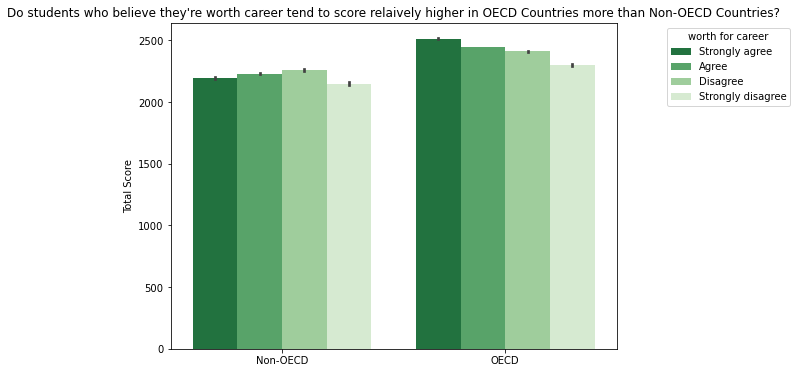

In [42]:
plt.figure(figsize=[8,6])


sb.barplot(data=pisa_sub, x="OECD", y="math_sum", hue="ST29Q05", palette="Greens_r")
plt.xlabel("")
plt.ylabel("Total Score")
plt.legend(title="worth for career", bbox_to_anchor=(1.4, 1))
plt.title("Do students who believe they're worth career tend to score relaively higher "
          "in OECD Countries more than Non-OECD Countries?");

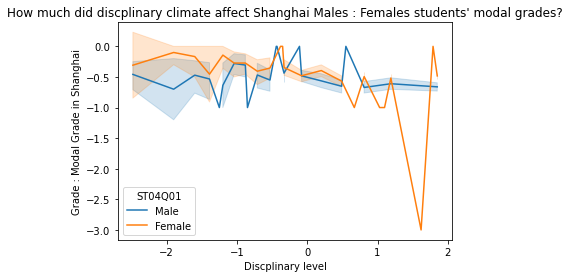

In [43]:
sb.lineplot(data=ch_shanghai, x="DISCLIMA", y='GRADE', hue="ST04Q01")
plt.xlabel("Discplinary level")
plt.ylabel("Grade : Modal Grade in Shanghai")
plt.title("How much did discplinary climate affect Shanghai Males : Females students' modal grades?");

There seems to be a negative association with higher disciplinary climate on female students in acheiving their modal grades in country, on the other side, males don't seem to be affected negatively by it, from analysis, **male students seem to have needed disciplinary climate in keeping their level of performance, and it seemed that low disciplined students had ebbs in performance, whereas on higher disciplinary levels they had surges in performance.**

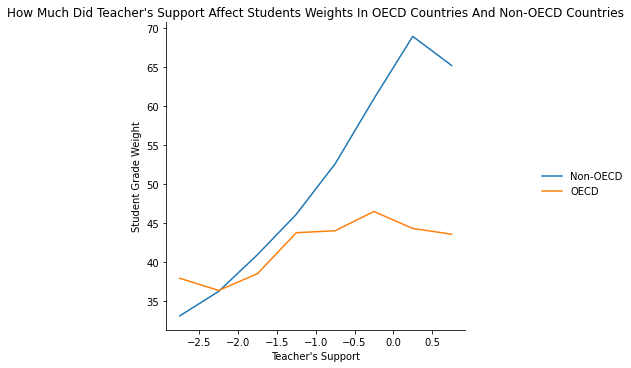

In [44]:
def mean_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. From Lesson 5.6 """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()

    # create plot
    plt.errorbar(x = bin_centers, y = means, **kwargs)
    

bin_edges = np.arange(-3, pisa_sub['TEACHSUP'].max()-0.5, 0.5)
g = sb.FacetGrid(data = pisa_sub, hue = 'OECD', size = 5)
g.map(mean_poly, "TEACHSUP", "W_FSTUWT", bins = bin_edges)
g.set_ylabels('Student Grade Weight')
g.set_xlabels("Teacher's Support")
g.add_legend(title="")
plt.title("How Much Did Teacher's Support Affect Students Weights In OECD Countries And Non-OECD Countries");

Non-OECD countries' students seemed to have been affected by Teacher's support more than OECD students.

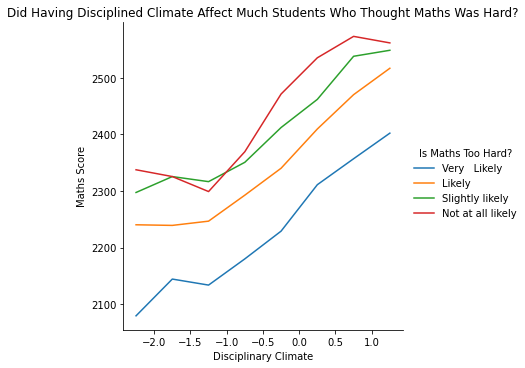

In [45]:
bin_edges = np.arange(-3, 2, .5)
g = sb.FacetGrid(data = pisa_sub, hue = 'ST44Q05', size = 5)
g.map(mean_poly, "DISCLIMA", "math_sum", bins = bin_edges)
g.set_ylabels('Maths Score')
g.set_xlabels("Disciplinary Climate")
g.add_legend(title="Is Maths Too Hard?")
plt.title("Did Having Disciplined Climate Affect Much Students Who Thought Maths Was Hard?");

Disciplinary climate had an overall positive effect on students who thought maths was hard, which shows how important it is of a teacher's role to keep classroom climate orderly and disciplined.

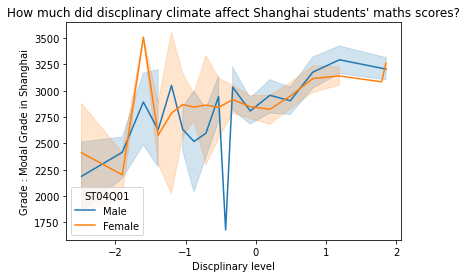

In [47]:
math_diff_ch = ch_shanghai[ch_shanghai.ST44Q05.isin(["Very   Likely", "Likely"])]

sb.lineplot(data=math_diff_ch, x="DISCLIMA", y='math_sum', hue="ST04Q01")
plt.xlabel("Discplinary level")
plt.ylabel("Grade : Modal Grade in Shanghai")
plt.title("How much did discplinary climate affect Shanghai students' maths scores?");

Students from Shanghai (highest acheiving in maths) who had an opinion that maths was hard subject, seemed to have benefited from Disciplinary cliamte in terms of acheiving better Maths scores.

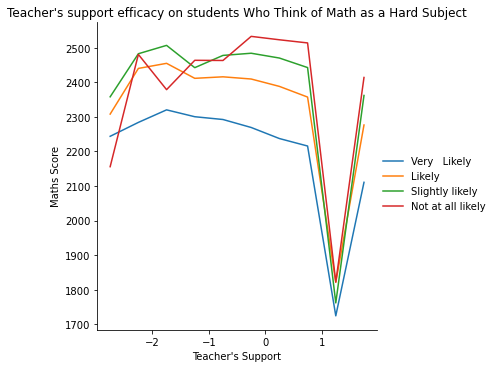

In [48]:
bin_edges = np.arange(-3, 2.5, 0.5)
g = sb.FacetGrid(data = pisa_sub, hue = 'ST44Q05', size = 5)
g.map(mean_poly, "TEACHSUP", "math_sum", bins = bin_edges)
g.set_ylabels('Maths Score')
g.set_xlabels("Teacher's Support")
g.add_legend(title="")
plt.title("Teacher's support efficacy on students Who Think of Math as a Hard Subject");

There was a huge drop after level 1 Teacher's support, no idea what causes that, maybe over-supporting a student is a thing, and it creates a dependency on that support more than student's own efforts.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> **OECD Countries**: Helped depict the impact of better education on supporting students who had ambitions for future career chances, that on OECD they'd end up getting better grades compared to less ambitious students, and that's opposed to what'd happen in Non-OECD Countries.

### Were there any interesting or surprising interactions between features?

> Of those who strongly agreed that they are worthy of career chances, in Non-OECD countries, they ended up getting equal to those who strongly disagreed they deserve those chances, and surprisingly lower than those who merely agreed or disagreed, Contrary to the naturally distributed scores in OECD Countries -- Those who strongly thought they are deserving ended up getting higher grades than those who didn't --, maybe in Non-OECD, they lacked in better education.


> Students who thought that the subject wasn't at all hard, if they didn't get good support from their teachers, would get bad scores compared to other students, maybe that's attributed to their stubborness or refusal to get help from teachers.

> On the other hand, students who thought the subject as very likely hard, the ones who recieved the least support from their teacher(s) had almost better grades than those who had the most support, the curve is weird in a way that it progressively became better with more support, then at -1.6 support score it declined.

In [ ]:
# Save data to load into, later in explanatory stage

# pisa_sub.to_csv("pisa_sub.csv", index=False)